In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '7'
from keras import models
from keras import layers
from keras.applications import VGG16

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [4]:
conv_base.trainable = False
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [7]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
base_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30, validation_data=validation_generator,
                              validation_steps=50) 


Epoch 1/30
100/100 [==============================] - 54s 539ms/step - loss: 0.5871 - acc: 0.6980 - val_loss: 0.4457 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 53s 534ms/step - loss: 0.4758 - acc: 0.7835 - val_loss: 0.3020 - val_acc: 0.8530
Epoch 3/30
100/100 [==============================] - 54s 537ms/step - loss: 0.4197 - acc: 0.8190 - val_loss: 0.4296 - val_acc: 0.8660
Epoch 4/30
100/100 [==============================] - 53s 535ms/step - loss: 0.4016 - acc: 0.8220 - val_loss: 0.4213 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 53s 533ms/step - loss: 0.3768 - acc: 0.8460 - val_loss: 0.4318 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 53s 531ms/step - loss: 0.3580 - acc: 0.8485 - val_loss: 0.1294 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 53s 532ms/step - loss: 0.3465 - acc: 0.8550 - val_loss: 0.1501 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epoches = range(1, len(acc) + 1)

In [15]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

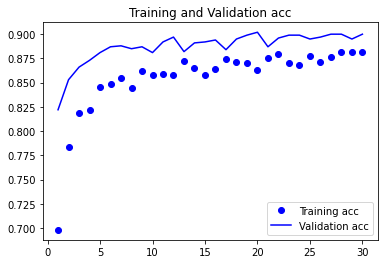

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epoches, acc, 'bo', label="Training acc")
plt.plot(epoches, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

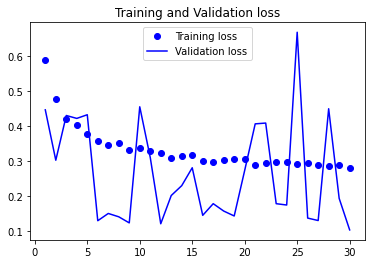

In [17]:
plt.plot(epoches, loss, 'bo', label="Training loss")
plt.plot(epoches, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()